In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # 훈련 데이터 셋 나누기
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.layers import LSTM
import sklearn.metrics as metrics
from math import sqrt
import seaborn as sns

In [ ]:
gait_data1 = pd.read_csv('/folder_name/GP1_0.6_marker.csv') # 1번 피실험자 0.6m/s 속도일때의 센서 위치 값
gait_data2 = pd.read_csv('/folder_name/GP6_0.6_marker.csv') # 6번 피실험자 0.6m/s 속도일때의 센서 위치 값
gait_data1.head()

,L_FCC_x,L_FM1_x,L_FM2_x,L_FM5_x,R_FCC_x,R_FM1_x,R_FM2_x,R_FM5_x,L_FCC_y,L_FM1_y,L_FM2_y,L_FM5_y,R_FCC_y,R_FM1_y,R_FM2_y,R_FM5_y,L_FCC_z,L_FM1_z,L_FM2_z,L_FM5_z,R_FCC_z,R_FM1_z,R_FM2_z,R_FM5_z
0,1.127087,1.332534,1.328893,1.305142,0.804407,1.017605,1.017485,0.991847,0.575397,0.587244,0.635224,0.681603,0.466974,0.487775,0.448289,0.396237,0.090627,0.084655,0.095734,0.067779,0.081946,0.058241,0.063082,0.048901
1,1.131831,1.337421,1.333921,1.310700,0.802088,1.015296,1.015148,0.989509,0.575327,0.586249,0.634272,0.680777,0.466954,0.487758,0.448250,0.396193,0.090195,0.086384,0.097342,0.069010,0.082106,0.058203,0.063062,0.048842
2,1.136807,1.342521,1.339171,1.316510,0.799617,1.012833,1.012659,0.987012,0.575228,0.585174,0.633242,0.679868,0.466931,0.487738,0.448206,0.396145,0.089767,0.088228,0.099043,0.070312,0.082279,0.058166,0.063040,0.048781
3,1.141961,1.347770,1.344579,1.322506,0.797009,1.010229,1.010033,0.984370,0.575094,0.584023,0.632139,0.678875,0.466905,0.487715,0.448160,0.396093,0.089354,0.090171,0.100820,0.071672,0.082464,0.058132,0.063014,0.048717
4,1.147230,1.353103,1.350078,1.328615,0.794281,1.007500,1.007287,0.981602,0.574925,0.582801,0.630968,0.677799,0.466875,0.487688,0.448109,0.396038,0.088963,0.092198,0.102656,0.073079,0.082663,0.058101,0.062985,0.048651


In [ ]:
data1 = pd.DataFrame({'secim':np.zeros(12000)}) # 0으로 처리
data2 = pd.DataFrame({'secim':np.ones(12000)}) # 1로 처리

data1 = pd.concat([gait_data1,data1],axis=1) # secim 데이터프레임 합치기
data2 = pd.concat([gait_data2,data2],axis=1) # secim 데이터프레임 합치기

data = data1.append(data2,ignore_index=True) # 1개 데이터프레임 뒤에 추가
data

,L_FCC_x,L_FM1_x,L_FM2_x,L_FM5_x,R_FCC_x,R_FM1_x,R_FM2_x,R_FM5_x,L_FCC_y,L_FM1_y,L_FM2_y,L_FM5_y,R_FCC_y,R_FM1_y,R_FM2_y,R_FM5_y,L_FCC_z,L_FM1_z,L_FM2_z,L_FM5_z,R_FCC_z,R_FM1_z,R_FM2_z,R_FM5_z,secim
0,1.127087,1.332534,1.328893,1.305142,0.804407,1.017605,1.017485,0.991847,0.575397,0.587244,0.635224,0.681603,0.466974,0.487775,0.448289,0.396237,0.090627,0.084655,0.095734,0.067779,0.081946,0.058241,0.063082,0.048901,0.0
1,1.131831,1.337421,1.333921,1.310700,0.802088,1.015296,1.015148,0.989509,0.575327,0.586249,0.634272,0.680777,0.466954,0.487758,0.448250,0.396193,0.090195,0.086384,0.097342,0.069010,0.082106,0.058203,0.063062,0.048842,0.0
2,1.136807,1.342521,1.339171,1.316510,0.799617,1.012833,1.012659,0.987012,0.575228,0.585174,0.633242,0.679868,0.466931,0.487738,0.448206,0.396145,0.089767,0.088228,0.099043,0.070312,0.082279,0.058166,0.063040,0.048781,0.0
3,1.141961,1.347770,1.344579,1.322506,0.797009,1.010229,1.010033,0.984370,0.575094,0.584023,0.632139,0.678875,0.466905,0.487715,0.448160,0.396093,0.089354,0.090171,0.100820,0.071672,0.082464,0.058132,0.063014,0.048717,0.0
4,1.147230,1.353103,1.350078,1.328615,0.794281,1.007500,1.007287,0.981602,0.574925,0.582801,0.630968,0.677799,0.466875,0.487688,0.448109,0.396038,0.088963,0.092198,0.102656,0.073079,0.082663,0.058101,0.062985,0.048651,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.401484,0.539083,0.538888,0.491567,0.734982,0.960724,0.959389,0.914911,0.582949,0.571319,0.618790,0.672879,0.434386,0.453045,0.403899,0.351520,0.240623,0.070071,0.077178,0.082381,0.073666,0.056643,0.065965,0.043973,1.0
23996,0.403338,0.538855,0.538673,0.491121,0.733247,0.959008,0.957666,0.913185,0.582399,0.571345,0.618785,0.672597,0.434347,0.453011,0.403868,0.351484,0.243477,0.071028,0.078189,0.083984,0.073644,0.056626,0.065923,0.043943,1.0
23997,0.404994,0.538718,0.538541,0.490780,0.731728,0.957507,0.956158,0.911674,0.581886,0.571377,0.618787,0.672344,0.434310,0.452981,0.403840,0.351452,0.245938,0.071880,0.079096,0.085413,0.073629,0.056612,0.065887,0.043917,1.0
23998,0.406465,0.538656,0.538475,0.490528,0.730402,0.956197,0.954845,0.910357,0.581409,0.571415,0.618796,0.672119,0.434277,0.452955,0.403817,0.351425,0.248048,0.072632,0.079903,0.086681,0.073618,0.056600,0.065855,0.043896,1.0


In [ ]:
x = data.drop(["secim"],axis=1) # x값은 secim 제외
y = data.secim.values # y값은 secim 값만 보유
print(x.head())
print(y)

    L_FCC_x   L_FM1_x   L_FM2_x  ...   R_FM1_z   R_FM2_z   R_FM5_z
0  1.127087  1.332534  1.328893  ...  0.058241  0.063082  0.048901
1  1.131831  1.337421  1.333921  ...  0.058203  0.063062  0.048842
2  1.136807  1.342521  1.339171  ...  0.058166  0.063040  0.048781
3  1.141961  1.347770  1.344579  ...  0.058132  0.063014  0.048717
4  1.147230  1.353103  1.350078  ...  0.058101  0.062985  0.048651

[5 rows x 24 columns]
[0. 0. 0. ... 1. 1. 1.]


In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42) # train 80% test 20%
x_train_val, x_val, y_train_val, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42) # train val 54% val 16%
print(x_train.shape)
print(y_train.shape)
print(x_train_val.shape)
print(y_train_val.shape)

(19200, 24)
(19200,)
(15360, 24)
(15360,)


In [ ]:
x_train_onehot = to_categorical(x_train)  # 원-핫 인코딩(타깃의 정수값에 해당하는 원소는 1, 나머지는 0으로 처리)
x_val_onehot = to_categorical(x_val)      # 선형 이진 분류 방식에 쓰일 수 있음.
print(x_train_onehot.shape)

(19200, 24, 2)


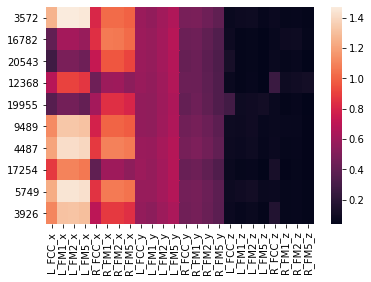

In [ ]:
sns.heatmap(x_train.head(10))

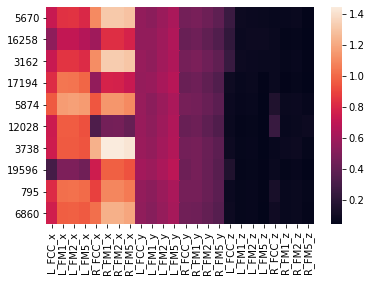

In [ ]:
sns.heatmap(x_train_val.head(10))

In [ ]:
model_bce = Sequential()
model_bce.add(LSTM(16, activation='relu', return_sequences=True, input_shape=(24, 2)))
model_bce.add(LSTM(8, activation='relu', return_sequences=True, input_shape=(24, 2)))
model_bce.add(Dense(1, activation='sigmoid'))
model_bce.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 16)            1216      
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 8)             800       
_________________________________________________________________
dense (Dense)                (None, 24, 1)             9         
Total params: 2,025
Trainable params: 2,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_bce.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae', 'mse'])
history = model_bce.fit(x_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(x_val_onehot, y_val))

Epoch 1/20
600/600 [==============================] - 21s 30ms/step - loss: 0.4217 - accuracy: 0.7580 - mae: 0.3037 - mse: 0.1445 - val_loss: 0.2343 - val_accuracy: 0.8865 - val_mae: 0.1615 - val_mse: 0.0795
Epoch 2/20
600/600 [==============================] - 18s 29ms/step - loss: 0.2391 - accuracy: 0.8821 - mae: 0.1631 - mse: 0.0814 - val_loss: 0.2286 - val_accuracy: 0.8897 - val_mae: 0.1544 - val_mse: 0.0779
Epoch 3/20
600/600 [==============================] - 17s 29ms/step - loss: 0.2295 - accuracy: 0.8885 - mae: 0.1555 - mse: 0.0782 - val_loss: 0.2181 - val_accuracy: 0.8952 - val_mae: 0.1466 - val_mse: 0.0735
Epoch 4/20
600/600 [==============================] - 18s 30ms/step - loss: 0.2188 - accuracy: 0.8974 - mae: 0.1479 - mse: 0.0739 - val_loss: 0.2080 - val_accuracy: 0.9016 - val_mae: 0.1428 - val_mse: 0.0697
Epoch 5/20
600/600 [==============================] - 18s 29ms/step - loss: 0.2103 - accuracy: 0.9042 - mae: 0.1429 - mse: 0.0707 - val_loss: 0.2033 - val_accuracy: 0.9

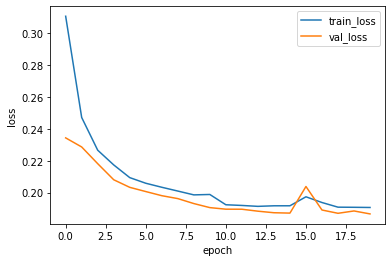

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

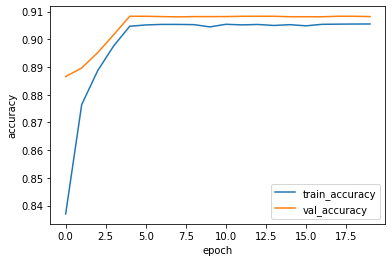

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

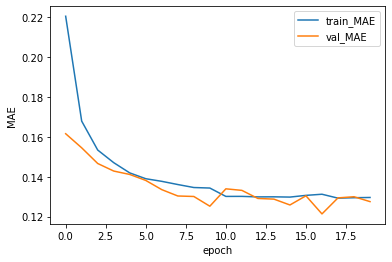

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.legend(['train_MAE', 'val_MAE'])
plt.show()

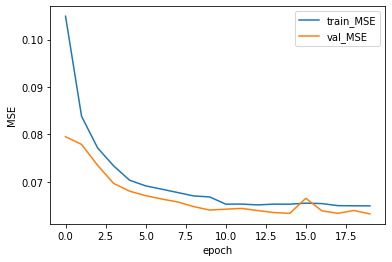

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend(['train_MSE', 'val_MSE'])
plt.show()

In [ ]:
loss_bce, accuracy_bce, mae_bce, mse_bce = model_bce.evaluate(x_val_onehot, y_val, verbose=0)
print('biary_crossentropy accuracy = ', accuracy_bce)
print('binary_crossentropy loss = ', loss_bce)
print('binary_crossentropy mae = ',  mae_bce)
print('binary_crossentropy mse = ',  mse_bce)
print('binary_crossentropy RMSE = ',  sqrt(mse_bce))
print('binary_crossentropy misclassfication = ', (1 - accuracy_bce))

biary_crossentropy accuracy =  0.9081703424453735
binary_crossentropy loss =  0.1865888237953186
binary_crossentropy mae =  0.12750010192394257
binary_crossentropy mse =  0.06325274705886841
binary_crossentropy RMSE =  0.25150098818666383
binary_crossentropy misclassfication =  0.09182965755462646


In [ ]:
model_mse = Sequential()
model_mse.add(LSTM(16, activation='relu', return_sequences=True, input_shape=(24, 2)))
model_mse.add(LSTM(8, activation='relu', return_sequences=True, input_shape=(24, 2)))
model_mse.add(Dense(1, activation='sigmoid'))
model_mse.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 24, 16)            1216      
_________________________________________________________________
lstm_3 (LSTM)                (None, 24, 8)             800       
_________________________________________________________________
dense_1 (Dense)              (None, 24, 1)             9         
Total params: 2,025
Trainable params: 2,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mse.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mae', 'mse'])
history = model_mse.fit(x_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(x_val_onehot, y_val))

Epoch 1/20
600/600 [==============================] - 19s 30ms/step - loss: 0.1554 - accuracy: 0.8071 - mae: 0.3233 - mse: 0.1554 - val_loss: 0.0822 - val_accuracy: 0.8865 - val_mae: 0.1767 - val_mse: 0.0822
Epoch 2/20
600/600 [==============================] - 17s 29ms/step - loss: 0.0817 - accuracy: 0.8847 - mae: 0.1719 - mse: 0.0817 - val_loss: 0.0922 - val_accuracy: 0.8303 - val_mae: 0.1905 - val_mse: 0.0922
Epoch 3/20
600/600 [==============================] - 17s 29ms/step - loss: 0.0802 - accuracy: 0.8830 - mae: 0.1676 - mse: 0.0802 - val_loss: 0.0769 - val_accuracy: 0.8912 - val_mae: 0.1687 - val_mse: 0.0769
Epoch 4/20
600/600 [==============================] - 17s 29ms/step - loss: 0.0781 - accuracy: 0.8871 - mae: 0.1628 - mse: 0.0781 - val_loss: 0.0741 - val_accuracy: 0.8995 - val_mae: 0.1581 - val_mse: 0.0741
Epoch 5/20
600/600 [==============================] - 17s 29ms/step - loss: 0.0765 - accuracy: 0.8957 - mae: 0.1580 - mse: 0.0765 - val_loss: 0.0742 - val_accuracy: 0.9

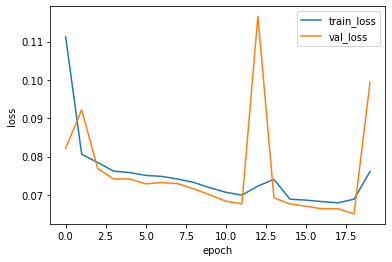

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

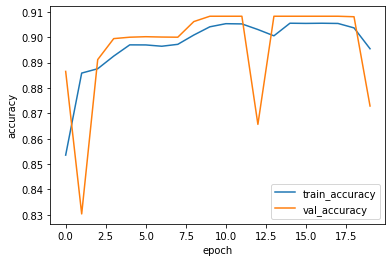

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

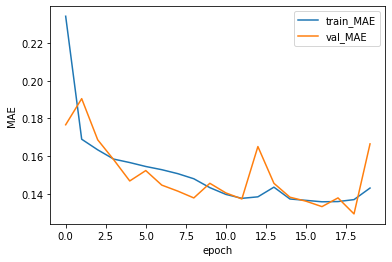

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.legend(['train_MAE', 'val_MAE'])
plt.show()

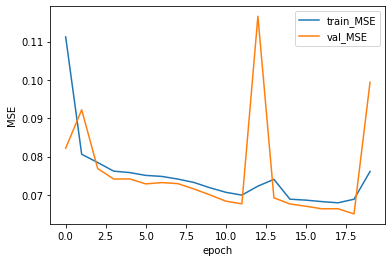

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend(['train_MSE', 'val_MSE'])
plt.show()

In [ ]:
loss_mse, accuracy_mse, mae_mse, mse_mse = model_mse.evaluate(x_val_onehot, y_val, verbose=0)
print('mse accuracy = ', accuracy_mse)
print('mse loss = ', loss_mse)
print('mse mae = ',  mae_mse)
print('mse mse = ',  mse_mse)
print('mse RMSE = ',  sqrt(mse_mse))
print('mse misclassfication = ', (1 - accuracy_mse))

mse accuracy =  0.8728947043418884
mse loss =  0.09940016269683838
mse mae =  0.16652488708496094
mse mse =  0.09940016269683838
mse RMSE =  0.3152779134301012
mse misclassfication =  0.12710529565811157
